# Classification of Images corresponding to different types of Brain Tumours:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
X_train=[]
Y_train=[]
IMG_SIZE=150
glioma='Training/glioma_tumor'
meningioma='Training/meningioma_tumor'
no='Training/no_tumor'
pituitary='Training/pituitary_tumor'

In [3]:
X_test=[]
Y_test=[]
IMG_SIZE=150
glioma_test='Testing/glioma_tumor'
meningioma_test='Testing/meningioma_tumor'
no_test='Testing/no_tumor'
pituitary_test='Testing/pituitary_tumor'

In [4]:
def assign_label(img,tumor_type):
    return tumor_type

In [5]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [6]:
def make_train_data(tumor_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tumor_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_train.append(np.array(img))
        Y_train.append(str(label))

In [7]:
make_train_data('glioma',glioma)
make_train_data('meningioma',meningioma)
make_train_data('no',no)
make_train_data('pituitary',pituitary)

100%|████████████████████████████████████████████████████████████████████████████████| 827/827 [00:08<00:00, 93.79it/s]


In [8]:
def make_test_data(tumor_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tumor_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_test.append(np.array(img))
        Y_test.append(str(label))

In [9]:
make_test_data('glioma',glioma_test)
make_test_data('meningioma',meningioma_test)
make_test_data('no',no_test)
make_test_data('pituitary',pituitary_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 28.32it/s]


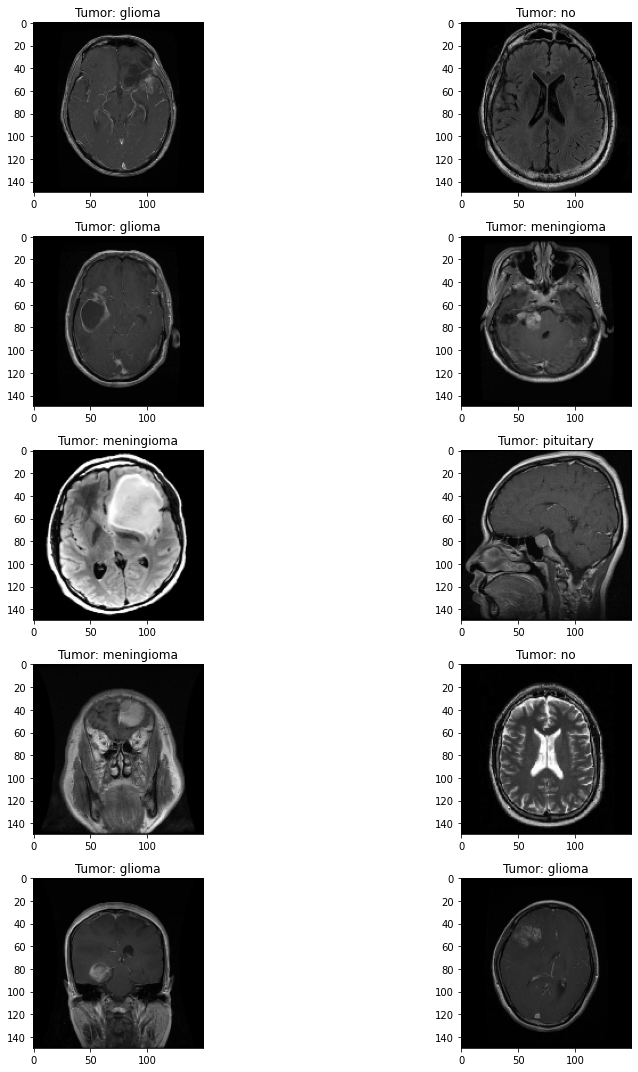

In [10]:
import random as rn

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Y_train))
        ax[i,j].imshow(X_train[l])
        ax[i,j].set_title('Tumor: '+Y_train[l])
        
plt.tight_layout()

In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le=LabelEncoder()
y_test=le.fit_transform(Y_test)
y_test=to_categorical(y_test,4)
X_test=np.array(X_test)
X_test=X_test/255

Using TensorFlow backend.


In [12]:
X_test.shape, y_test.shape

((394, 150, 150, 3), (394, 4))

In [13]:
y_train=le.fit_transform(Y_train)
y_train=to_categorical(y_train,4)
X_train=np.array(X_train)
X_train=X_train/255

In [14]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [15]:
X_train= X_train.reshape(X_train.shape[0], 150 * 150 * 3) # New dimension becomes 50000 x 3072
X_test = X_test.reshape(X_test.shape[0], 150 * 150 * 3) # New dimension becomes 10000 x 3072

In [16]:
X_train.shape,X_test.shape

((2870, 67500), (394, 67500))

In [17]:
#Model:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [45]:
model = Sequential()
model.add(Dense(64, init='uniform', activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, init='uniform', activation='relu'))

model.add(Dense(4, activation='sigmoid'))
model.add(Dropout(0.2))

C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", input_dim=67500, kernel_initializer="uniform")`
  
C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Siddhartha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  


In [46]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                4320064   
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_23 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_24 (Dropout)         (None, 4)                 0         
Total params: 4,322,740
Trainable params: 4,322,740
Non-trainable params: 0
____________________________________________

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=32,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 2870 samples, validate on 394 samples
Epoch 1/32
 - 62s - loss: 1.2575 - accuracy: 0.7294 - val_loss: 0.6690 - val_accuracy: 0.7462
Epoch 2/32
 - 8s - loss: 1.1458 - accuracy: 0.7679 - val_loss: 0.7441 - val_accuracy: 0.7405
Epoch 3/32
 - 8s - loss: 1.1525 - accuracy: 0.7837 - val_loss: 0.6604 - val_accuracy: 0.7538
Epoch 4/32
 - 8s - loss: 1.0985 - accuracy: 0.7986 - val_loss: 0.6414 - val_accuracy: 0.7246
Epoch 5/32
 - 8s - loss: 1.0766 - accuracy: 0.8142 - val_loss: 0.7052 - val_accuracy: 0.7303
Epoch 6/32
 - 7s - loss: 1.0390 - accuracy: 0.8292 - val_loss: 0.7643 - val_accuracy: 0.7392
Epoch 7/32
 - 7s - loss: 1.0121 - accuracy: 0.8431 - val_loss: 0.7344 - val_accuracy: 0.7221
Epoch 8/32
 - 7s - loss: 1.0196 - accuracy: 0.8503 - val_loss: 0.6739 - val_accuracy: 0.7735
Epoch 9/32
 - 7s - loss: 1.1034 - accuracy: 0.8492 - val_loss: 0.7242 - val_accuracy: 0.7938
Epoch 10/32
 - 7s - loss: 0.9445 - accuracy: 0.8775 - val_loss: 0.6781 - val_accuracy: 0.7773
Epoch 11/32
 - 7s - l

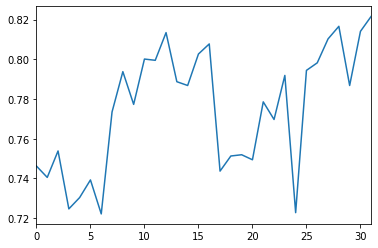

In [49]:
df_result = pd.DataFrame.from_dict(history.history)

df_result['val_accuracy'].plot()

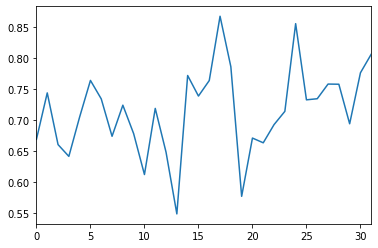

In [50]:
df_result['val_loss'].plot()

In [ ]:
y_pred = model.predict(X_test)